# **Load file** **

In [1]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import seaborn as sns


In [2]:
from google.colab import files


uploaded = files.upload()


Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')


# **Xem dữ liệu**

---



In [ ]:
train_data


,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
...,...,...,...,...,...
1816,Train_1816,0,0,0,1
1817,Train_1817,1,0,0,0
1818,Train_1818,1,0,0,0
1819,Train_1819,0,0,1,0


In [ ]:
data = train_data[['healthy', 'multiple_diseases', 'rust', 'scab']].sum(axis=0)
data

healthy              516
multiple_diseases     91
rust                 622
scab                 592
dtype: int64

In [4]:
class_names=train_data.loc[:,'healthy':].columns
print(class_names)

number=0
train_data['label']=0
for i in class_names:
    train_data['label']=train_data['label'] + train_data[i] * number
    number=number+1

Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


In [ ]:
train_data

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0
...,...,...,...,...,...,...
1816,Train_1816,0,0,0,1,3
1817,Train_1817,1,0,0,0,0
1818,Train_1818,1,0,0,0,0
1819,Train_1819,0,0,1,0,2


# **Điều chỉnh lại dữ liệu và tổ chức lại lưu trữ file ảnh.**

In [5]:
def get_label_img(img):
    if search("Train",img):
        img=img.split('.')[0]
        label=train_data.loc[train_data['image_id']==img]['label']
        print(label)
        return label

In [6]:
# copy tổ chức lại file ảnh train
DIR= r'/content/drive/MyDrive/NHANDANG/plant-pathology-2020-fgvc7/images/train/'

def create_train_path():
    images=natsort.natsorted(os.listdir(DIR))
    for img in tqdm(images):
        label=get_label_img(img)
        path=os.path.join(DIR,img)
        
        if search("Train",img):
            if (img.split("_")[1].split(".")[0]) and label.item()==0:
                shutil.copy(path,r'/content/drive/MyDrive/NHANDANG/plant-pathology-2020-fgvc7/images/train/healthy')
            
            elif(img.split("_")[1].split(".")[0]) and label.item()==1:
                shutil.copy(path,r'/content/drive/MyDrive/NHANDANG/plant-pathology-2020-fgvc7/images/train/multiple_disease')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==2:
                shutil.copy(path,r'/content/drive/MyDrive/NHANDANG/plant-pathology-2020-fgvc7/images/train/rust')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==3:
                shutil.copy(path,r'/content/drive/MyDrive/NHANDANG/plant-pathology-2020-fgvc7/images/train/scab')
                

  
#create_train_path()


In [ ]:
# copy tổ chức lại file ảnh test
def create_test_path():
    images=natsort.natsorted(os.listdir(DIR))
    for img in tqdm(images):
        label=get_label_img(img)
        path=os.path.join(DIR,img)
        
        if search("Test",img):
          shutil.copy(path,r'/content/drive/MyDrive/NHANDANG/plant-pathology-2020-fgvc7/images/test')

#create_test_path()

# **Kiểm tra dữ liệu ảnh và load dữ liệu ảnh để huấn luyện**

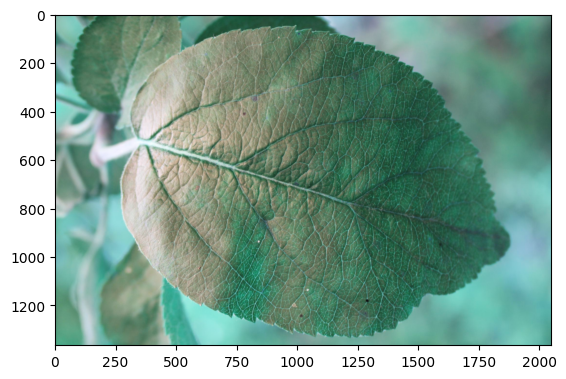

In [7]:
Train_DIR=r'/content/drive/MyDrive/NHANDANG/plant-pathology-2020-fgvc7/images/train'
Categories=['healthy','multiple_disease','rust','scab']


for category in Categories:
    path=os.path.join(Train_DIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [18]:
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []
datadir = r'/content/drive/MyDrive/NHANDANG/plant-pathology-2020-fgvc7/images/train/'
categories=['healthy','multiple_disease','rust','scab']

for i in categories:
  class_num = categories.index(i) 
  path=os.path.join(datadir,i)    #tạo path
  for img in os.listdir(path):
    img_arr = cv2.imread(os.path.join(path,img))
    img_resize = cv2.resize(img_arr,(150,150))    # resize ảnh
    flat_data.append(img_resize.flatten())     # flat ảnh
    images.append(img_resize)
    target.append(class_num)
flat_data=np.array(flat_data)
target = np.array(target)
images = np.array(images) 

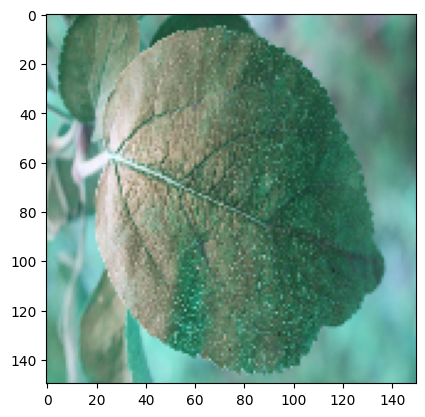

In [ ]:
plt.imshow(images[0])
plt.show()

In [ ]:
print("Shape of features: " ,flat_data.shape)

Shape of features:  (1074, 67500)


In [ ]:
target.shape

(1074,)

<BarContainer object of 4 artists>

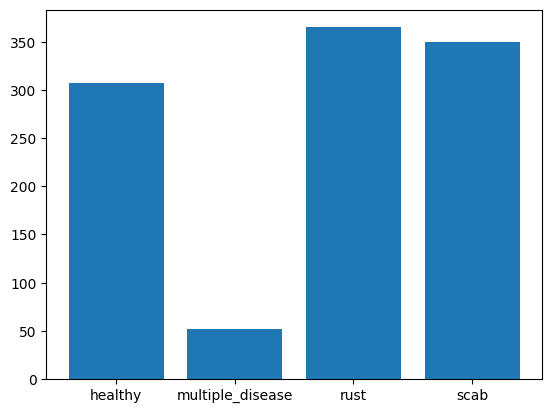

In [ ]:
np.unique(target,return_counts=True)
unique,count=np.unique(target,return_counts=True)
plt.bar(categories,count)

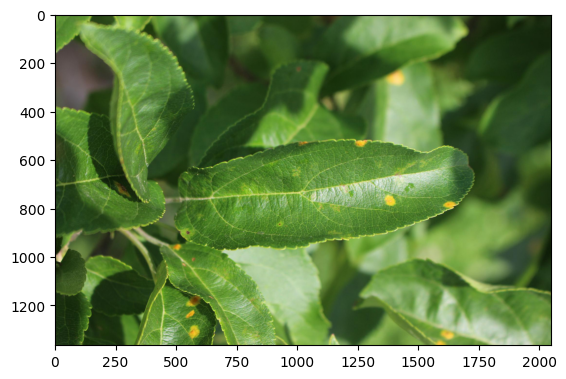

In [ ]:
image1=Image.open(r'/content/drive/MyDrive/NHANDANG/plant-pathology-2020-fgvc7/images/Test_0.jpg')
plt.imshow(image1)
plt.show()

# **Tạo tập dữ liệu train và test cho model**

In [19]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.2,random_state=77,stratify=target)

In [ ]:
print(X_train.shape)
print(x_test.shape)

(859, 67500)
(215, 67500)


# **Tiến hành train model**

In [20]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma=0.001, probability=True)
svc.fit(X_train, y_train)

SVC(gamma=0.001, kernel='linear', probability=True)

# **Test tập dữ liệu đã split và kiểm chứng model**

In [ ]:
y_pred = svc.predict(x_test)

In [ ]:
y_pred_prob= svc.predict_proba(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The model is 38.139534883720934% accurate


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.40      0.37      0.39        62
           1       0.00      0.00      0.00        10
           2       0.35      0.32      0.33        73
           3       0.43      0.51      0.47        70

    accuracy                           0.38       215
   macro avg       0.30      0.30      0.30       215
weighted avg       0.38      0.38      0.38       215



# **Tiến hành kiểm thử dữ liệu test.cvs**

In [31]:
target = []
images = []
flat_data = []
title_img=[]
datadir = r'/content/drive/MyDrive/NHANDANG/plant-pathology-2020-fgvc7/images/test/'



path=os.path.join(datadir)    #tạo path
for img in os.listdir(path):
  title_img.append(img.title()) #luu lai ten anh.jpg
  img_arr = cv2.imread(os.path.join(path,img))
  img_resize = cv2.resize(img_arr,(150,150))    # resize ảnh
  flat_data.append(img_resize.flatten())     # flat ảnh
  images.append(img_resize)
title_img=np.array(title_img)
flat_data=np.array(flat_data)
images = np.array(images) 

In [32]:
title_img

array(['Test_821.Jpg', 'Test_822.Jpg', 'Test_823.Jpg', ...,
       'Test_818.Jpg', 'Test_819.Jpg', 'Test_820.Jpg'], dtype='<U13')

In [22]:
print("Shape of features: " ,flat_data.shape)

Shape of features:  (1821, 67500)


In [23]:
y_pred = svc.predict(flat_data)

In [24]:
y_pred

array([3, 2, 3, ..., 0, 2, 3])

# **Tạo file csv cho kết quả trên**

In [33]:

yprednew=[]
for i in y_pred:
    if i==0:
        yprednew.append("healthy")
    if i==1:
        yprednew.append("multiple_disease")
    if i==2:
        yprednew.append("rust")
    if i==3:
        yprednew.append("scab")
ytestnew=np.array(yprednew)
final=np.column_stack((title_img,ytestnew))
df=pd.DataFrame(final,columns=['ImageId','predic'])
df.head()
df.to_csv('predict.csv',index=False)

# **Trực quan một ví dụ**

scab


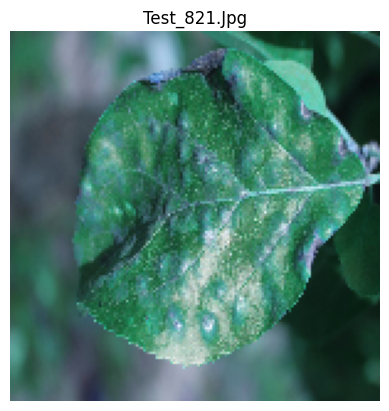

In [39]:
plt.imshow(images[0], cmap='gray')
plt.title(title_img[0])
plt.axis('off')
print(yprednew[0])